## Mayo de 2021
## IB0017 Examen parte B.2
## Estudiante: Mateo Cerdas Barboza

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Modelos matemáticos a utilizar
#### Maxwell
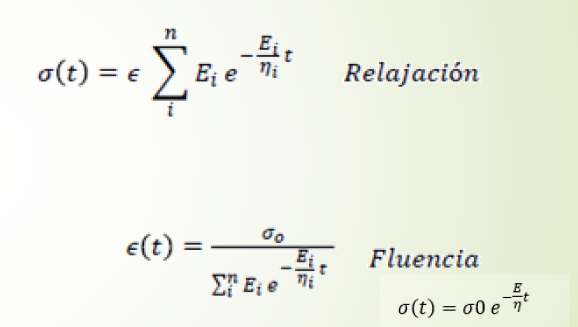

#### Kelvin
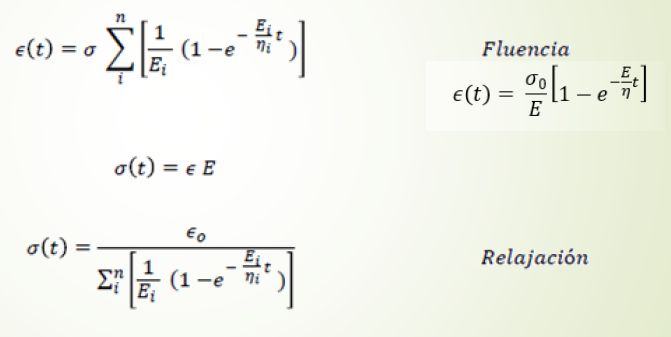

#### Burger
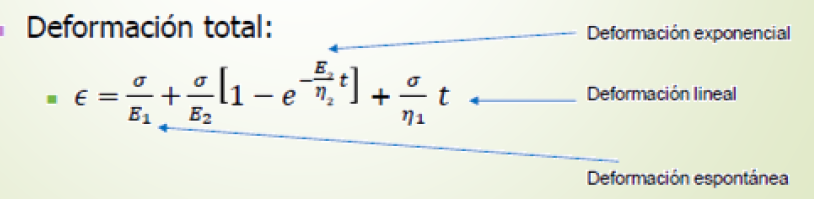

#### a) La ecuación general de deformación unitaria ϵ en función del tiempo

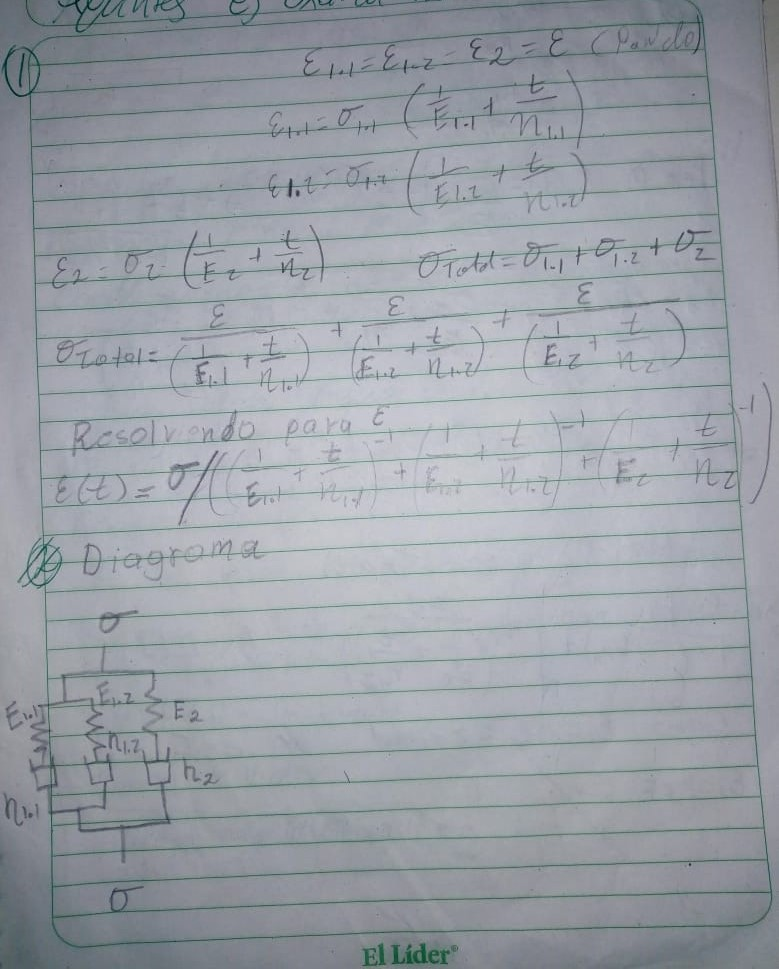

#### b) La ecuación de relajación.
#### c) La ecuación de fluencia.

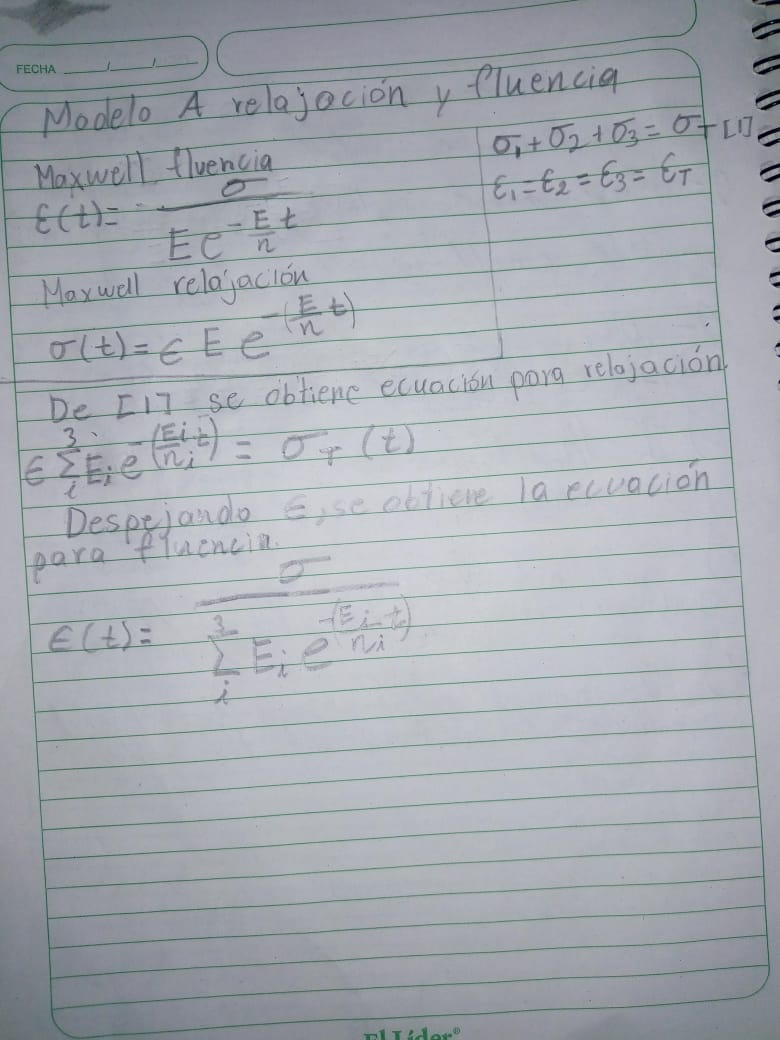

### Definir  sigma en función de epsilon y viceversa, según las ecuaciones planteadas

In [34]:
def epsilon_as_sigma(E_series,visc_series,sigma,t):
    zi=zip(E_series,visc_series)
    suma=sum([((1/E)+(t/n))**-1 for E,n in zi])
    return sigma/suma

In [37]:
#definir datos dados de los elementos
#MODULO DE ELASTICIDAD DE LOS RESORTES(Pa) 
R1=5
R2=2
R3=10
#Viscocidad de los émbolos(Pa/s)
n1=200
n2=150
n3=500

#### Definir función que devuelve  la suma  del modelo de maxwell para una serie de tiempo *time* 

In [36]:
def maxwell_sum_t(E_series, Tau_series, time):
    zi=zip(E_series, Tau_series)
    result=sum([E*np.exp(-(1/Tau)*time) for E,Tau in zi])
    return result

In [38]:
#Usar la función anterior para obtener los datos y gráficar relajación y fluencia en el tiempo.
#Configurar parámetros de entrada de la función
E_series=np.array([R1,R2,R3])
visc_series=np.array([n1,n2,n3])
Tau_series=visc_series/E_series
#definir esfuerzo inicial (Pa)
sigma=0.75
#definir deformación inicial(mm/mm)
epsilon=0.4
# Generar el vector de sumas del modelo de Maxwell para el domio de tiempo reuqerido al aplicar función maxwell_sum_t
time_series=np.array(range(0,100+1))
sum_series=maxwell_sum_t(E_series, Tau_series,time_series)

#### 4) Suponga un esfuerzo inicial  y grafique cada segundo (al menos hasta 100 s) el fenómeno de fluencia según el modelo seleccionado. (5 pts)

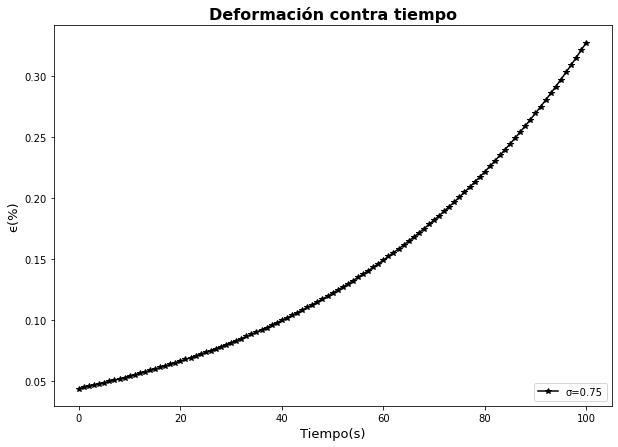

In [39]:
plt.figure(figsize=(10,7))
y=sigma/sum_series
label=f"σ={sigma}"
plt.plot(time_series,y,label=label,color="k",marker="*")
plt.legend(loc='lower right')
plt.title("Deformación contra tiempo", fontsize=16, fontweight='bold')
plt.xlabel("Tiempo(s)",fontsize=13)
plt.ylabel("ϵ(%)",fontsize=13)
plt.show()

#### 3) Suponga una deformación unitaria inicial  y grafique cada segundo (al menos hasta 100 s) el fenómeno de relajación según el modelo seleccionado. (5 pts)

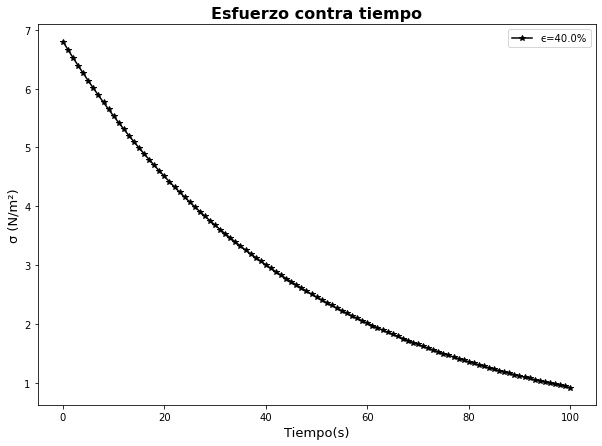

In [40]:
plt.figure(figsize=(10,7))
y=epsilon*sum_series
label=f"ϵ={epsilon*100}%"
plt.plot(time_series,y,label=label,color="k",marker="*")
plt.legend(loc='upper right')
plt.title("Esfuerzo contra tiempo", fontsize=16, fontweight='bold')
plt.xlabel("Tiempo(s)",fontsize=13)
plt.ylabel("σ (N/m²)",fontsize=13)
plt.show() 

### Para el evento de carga y descarga que se muestra en el siguiente cuadro, grafique la deformación sufrida cada segundo según el modelo seleccionado. (5 pts)

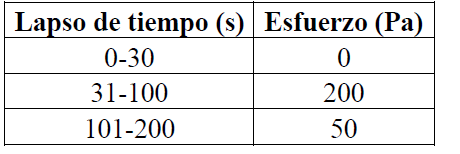

In [75]:
#Graficar usando la función sigma_as_epsilon definida anteriormente para obtener deformación en el tiempo.
#definir nueva serie de tiempo de 0 a 200s
time_series=np.array(range(0,200+1))
#definir vector vacío de la deformación en cada segundo(a llenar)
defo=np.array([])
#el siguiente ciclo va dar los valores de deformación en el tiempo
counter_1=1 #contadores para reinciar tiempo cada vez que hay un nuevo esfuerzo
counter_2=1
counter_3=1
counter_4=1
for s in time_series:
    if 30>=s>=0:
        sigma=0
        defo=np.append(defo,epsilon_as_sigma(E_series,visc_series,sigma,s))#agregar al vector de deformaciones

        #capturar últimos valores de los elementos requeridos
        #if s==30:
        #    defo_30=defo[-1]
    if 100>=s>=31:
        sigma=200
        defo=np.append(defo,epsilon_as_sigma(E_series,visc_series,sigma,counter_1)) #agregar al vector de deformaciones

        #capturar últimos valores de los elementos requeridos
        #if s==100:
        #    defo_100=defo[-1]
        counter_1+=1
    if 200>=s>=101:
        sigma=50
        #En este lapso se suma la deformación obtenida desde s=30 a s=100, debido a que el piston no recupera
        defo_100_menos_31=defo[100]-defo[31]
        defo=np.append(defo,defo_100_menos_31+epsilon_as_sigma(E_series,visc_series,sigma,counter_2)) #agregar al vector de deformaciones
        #capturar últimos valores de los elementos requeridos
        counter_2+=1
    

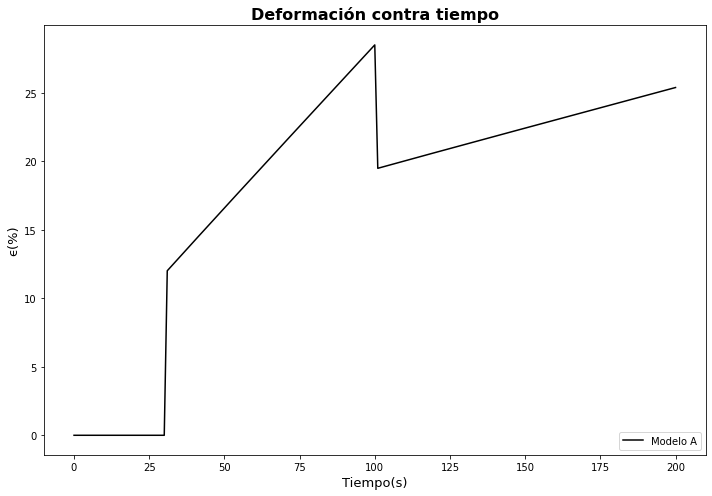

In [76]:
#Graficar la deformación contra el tiempo
plt.figure(figsize=(10,7))
plt.plot(time_series,defo,label="Modelo A",color="k")
plt.legend(loc='lower right')
plt.title("Deformación contra tiempo", fontsize=16, fontweight='bold')
plt.xlabel("Tiempo(s)",fontsize=13)
plt.ylabel("ϵ(%)",fontsize=13)
plt.tight_layout()
plt.show()